In [134]:
import csv
import numpy as np
import sklearn as sj
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from os import path
from matplotlib import pyplot
import IPython
import random
from collections import OrderedDict

header = []

match_information = {}

HOME_TEAM_INDEX = 2
AWAY_TEAM_INDEX = 3

matches = []

data = ['data/championship_18_19.csv', 'data/1.csv', 'data/2.csv', 'data/3.csv', 'data/4.csv', 'data/5.csv', 
        'data/6.csv', 'data/7.csv', 'data/8.csv', 'data/9.csv', 'data/pl_2014.csv', 'data/10.csv',
       'data/11.csv', 'data/12.csv', 'data/13.csv', 'data/14.csv', 'data/15.csv', 'data/16.csv', 'data/17.csv', 
       'data/11.csv', 'data/12.csv', 'data/13.csv', 'data/14.csv', 'data/15.csv', 'data/16.csv', 'data/17.csv', 
       'data/18.csv', 'data/19.csv', 'data/20.csv', 'data/21.csv', 'data/22.csv', 'data/23.csv', 'data/24.csv',
       'data/25.csv', 'data/26.csv', 'data/27.csv', 'data/28.csv', 'data/29.csv', 'data/30.csv', 'data/31.csv',
       'data/32.csv', 'data/33.csv']  

def add_match(team, match):
    if team.lower() in match_information.keys():
        match_information[team.lower()].append(match)
    else:
        match_information[team.lower()] = [match]
        


def get_heading(path):
    with open(path, 'r') as csvfile:
        match_reader = csv.reader(csvfile)
        
        header = next(match_reader)

    # Generate the heading index map.
    return OrderedDict({heading: index for index, heading in enumerate(header)})

heading_index_map = get_heading(data[0])

home_team_wins = []
away_team_wins = []
draws = []


def read_database(path, home_teams_wins, away_team_wins, draws , match_information):
    with open(path, 'r') as csvfile:
        match_reader = csv.reader(csvfile)
    
        header = next(match_reader)

        for row in match_reader:

            temp_dict = OrderedDict()

            flag = False
            

            # Loop through every row and add to the dictionary.
            for colno, data_item in enumerate(row):
                temp_dict[header[colno]] = data_item
                
            
                if not data_item:
            
                    flag = True
                    
            if flag:
                continue
             
     
            # Need to remove the bolton vs brentford match. This match did not take place.
            if temp_dict['HomeTeam'].lower() != 'bolton' or temp_dict['AwayTeam'].lower() != 'brentford':     
                # Add each match to both the home team and the away team.
                add_match(row[HOME_TEAM_INDEX], temp_dict)
                add_match(row[AWAY_TEAM_INDEX], temp_dict)

                # Each row represents a single match that has been played.
                # Need to insert the match into the relevant list.
                if row[heading_index_map['FTR']] == 'H':
                    home_team_wins.append(row)
                elif row[heading_index_map['FTR']] == 'A':
                     away_team_wins.append(row)
                elif row[heading_index_map['FTR'] == 'D']:
                     draws.append(row)
                

        return (home_team_wins, away_team_wins, draws, match_information)
                
              

for data_item in data:
    home_team_wins, away_team_wins, draws, match_information = read_database(data_item, 
                                                        home_team_wins, away_team_wins, draws, match_information)
    
    
print(len(home_team_wins))
print(len(away_team_wins))
print(len(draws))

# Now we need to shuffle each list.
random.shuffle(home_team_wins)
random.shuffle(away_team_wins)
random.shuffle(draws)


smallest = min(len(home_team_wins), len(away_team_wins), len(draws))

# Now we have the smallest we need to merge into one list.
matches = home_team_wins[:smallest] + away_team_wins[:smallest] + draws[:smallest]


8277
5732
5066


In [135]:
# Let's display all of the Leeds matches.https://stackoverflow.com/questions/9573244/how-to-check-if-the-string-is-empty

"""leeds_matches = match_information['leeds']

for match in leeds_matches:
    print("{home_team} {score_home} - {score_away} {away_team}".format(home_team = match['HomeTeam'],
                                                                       score_home = match['FTHG'],
                                                                       score_away = match['FTAG'],
                                                                       away_team = match['AwayTeam']))
                                                                       
                                                                       
"""

'leeds_matches = match_information[\'leeds\']\n\nfor match in leeds_matches:\n    print("{home_team} {score_home} - {score_away} {away_team}".format(home_team = match[\'HomeTeam\'],\n                                                                       score_home = match[\'FTHG\'],\n                                                                       score_away = match[\'FTAG\'],\n                                                                       away_team = match[\'AwayTeam\']))\n                                                                       \n                                                                       \n'

In [156]:
# Now I need a method which converts this information into a NumPy array.

# I want to see how much an influence a Referee has in the game. But I need to find all the unique referees.
# A set is the best way of achieving this.

referees_string = set([])
for team in match_information.values():
        for match in team:
            referees_string.add(match['Referee'])
            
# I probably won't use this but we shall see.
print("List of all the referees in the Championship: " + str(referees_string)) 

KeyError: 'Referee'

In [157]:
# Now I need to gather the information into a numpy array.
print(heading_index_map)

OrderedDict([('Div', 0), ('Date', 1), ('HomeTeam', 2), ('AwayTeam', 3), ('FTHG', 4), ('FTAG', 5), ('FTR', 6), ('HTHG', 7), ('HTAG', 8), ('HTR', 9), ('Referee', 10), ('HS', 11), ('AS', 12), ('HST', 13), ('AST', 14), ('HF', 15), ('AF', 16), ('HC', 17), ('AC', 18), ('HY', 19), ('AY', 20), ('HR', 21), ('AR', 22), ('B365H', 23), ('B365D', 24), ('B365A', 25), ('BWH', 26), ('BWD', 27), ('BWA', 28), ('IWH', 29), ('IWD', 30), ('IWA', 31), ('PSH', 32), ('PSD', 33), ('PSA', 34), ('WHH', 35), ('WHD', 36), ('WHA', 37), ('VCH', 38), ('VCD', 39), ('VCA', 40), ('Bb1X2', 41), ('BbMxH', 42), ('BbAvH', 43), ('BbMxD', 44), ('BbAvD', 45), ('BbMxA', 46), ('BbAvA', 47), ('BbOU', 48), ('BbMx>2.5', 49), ('BbAv>2.5', 50), ('BbMx<2.5', 51), ('BbAv<2.5', 52), ('BbAH', 53), ('BbAHh', 54), ('BbMxAHH', 55), ('BbAvAHH', 56), ('BbMxAHA', 57), ('BbAvAHA', 58), ('PSCH', 59), ('PSCD', 60), ('PSCA', 61)])


In [158]:
# First of all there are three classes HomeWin, Draw, AwayWin.
y_classes = {0: 'HomeWin', 1: 'AwayWin', 2:'Draw'}

# Now we need to extract the relevant data from the matches list.
X = []
for match in matches:
    X.append((match[heading_index_map['HS'] : heading_index_map['AR'] + 1]))
             
X = np.array(X)

X = X.astype(np.float)

print(X)

# Convert X so all elements are floats


X_copy = np.array(X, copy=True)

# Multiplying columns of X together.
# Iterate over the columns
for index, column in enumerate(X_copy.T):
    # Need to create new columns by multiplying two columns together.
    
    for mul_index in range(index, X_copy.shape[1]):
        new_col = np.multiply(X_copy[:, index], X_copy[:, mul_index])
        new_col = np.reshape(new_col, (-1,1))
        X = np.append(X, new_col, axis=1)

          
print(X.shape)

[[14. 11.  8. ...  0.  0.  1.]
 [ 7.  6.  4. ...  1.  0.  0.]
 [16.  9.  5. ...  3.  0.  0.]
 ...
 [12. 10.  6. ...  3.  0.  0.]
 [12.  8.  6. ...  4.  0.  0.]
 [ 8.  7.  5. ...  2.  0.  0.]]
(15198, 90)


In [159]:
# Now that we have produces X, we need to find the corresponding classes.
Y = []

for match in matches:
    # Get the final result.
    result = match[heading_index_map['FTR']]
    
    if result == 'H':
        Y.append(0)
    elif result == 'A':
        Y.append(1)
    elif result == 'D':
        Y.append(2)
        
Y = np.array(Y)

In [160]:
# We have the X and the Y we can now produce a model for the data.
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train)
print(y_train)

log_reg = LogisticRegression(max_iter=10000, C=100, penalty='l1', solver='liblinear').fit(X_train, y_train)

[[17. 13. 14. ...  0.  0.  0.]
 [24. 15.  9. ...  0.  0.  0.]
 [ 8.  6.  1. ...  0.  0.  0.]
 ...
 [12.  7.  2. ...  0.  0.  0.]
 [11.  2.  1. ...  0.  0.  1.]
 [ 6.  4.  2. ...  0.  0.  0.]]
[0 1 1 ... 0 0 0]


In [161]:
print("Training set score: {:.3f}".format(log_reg.score(X_train, y_train)))

Training set score: 0.523


In [162]:
print("Test set score: {:.3f}".format(log_reg.score(X_test, y_test)))

Test set score: 0.511


In [168]:
# Let's plot feature importance.
importance = log_reg.coef_[0]

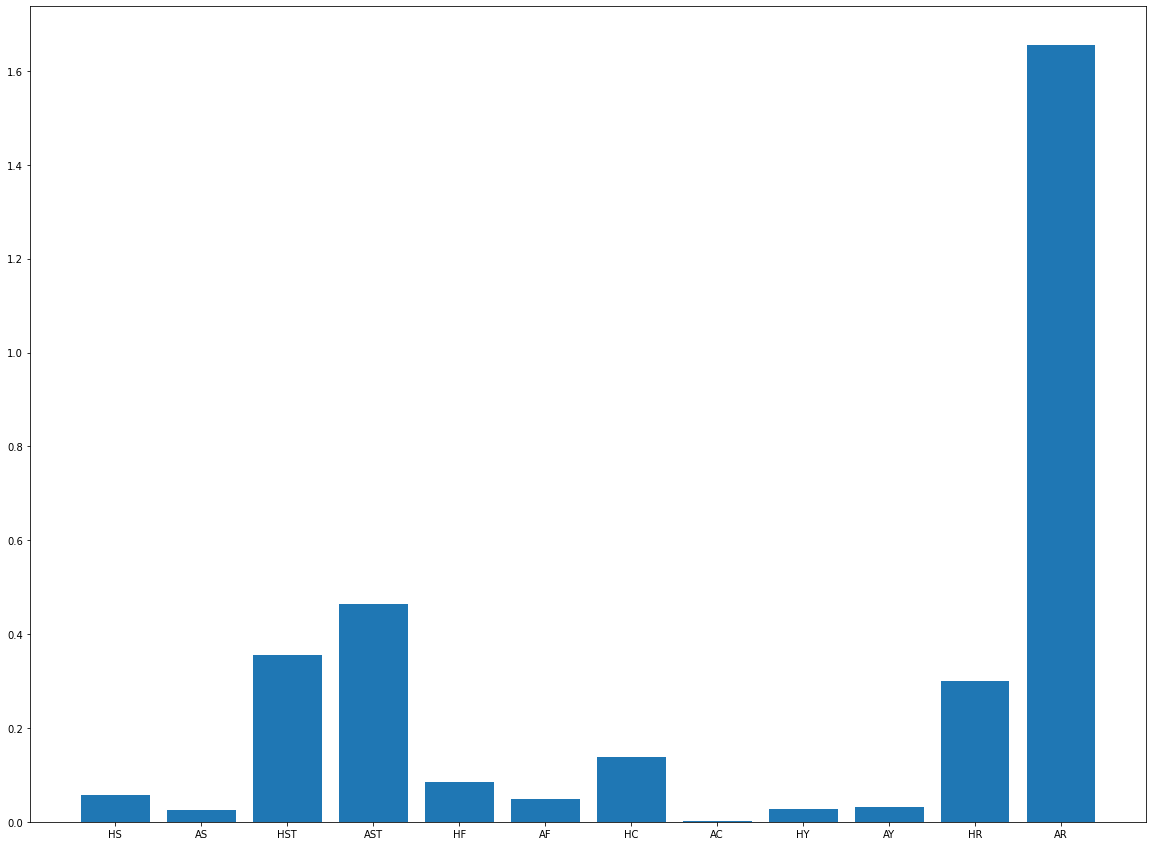

In [173]:
relevant_features = importance[:12]


fig, ax = plt.subplots(figsize=(20, 15))
labels = list(heading_index_map.keys())[heading_index_map['HS']:heading_index_map['AR'] + 1]


pyplot.bar(labels, abs(relevant_features))
plt.show()

In [171]:
def make_prediction(stats):
    np_stats = np.array(stats, dtype=np.float)
    
    np_stats = np.reshape(np_stats, (-1, 1)).T
    
    np_stats_copy = np.array(np_stats, copy=True)
    
    # Multiplying columns of X together.
    # Iterate over the columns
    for index, column in enumerate(np_stats_copy.T):
        # Need to create new columns by multiplying two columns together.

        for mul_index in range(index, np_stats_copy.shape[1]):
            new_col = np.multiply(np_stats_copy[:, index], np_stats_copy[:, mul_index])
            new_col = np.reshape(new_col, (-1,1))
            np_stats = np.append(np_stats, new_col, axis=1)
            

    print(y_classes[log_reg.predict(np_stats)[0]])

    print(log_reg.predict_proba(np_stats))
    
    
make_prediction([15, 8, 7, 4, 9, 12, 1, 5, 0, 1, 0, 0])

make_prediction([14, 13, 2, 7, 9, 8, 10, 7, 1, 2, 1, 0])

HomeWin
[[0.67260334 0.13492893 0.19246774]]
AwayWin
[[0.02372662 0.78826541 0.18800797]]
